<a href="https://colab.research.google.com/github/ShemMwanza/ML-Lab-1/blob/main/ML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [30]:
size = 100

Generate fake data

In [31]:
fake_dataset={'Office Size':np.random.normal(100,0.5,size),'Office Price':np.random.uniform(100,1000,size)}

In [32]:
pd.DataFrame(fake_dataset)

,Office Size,Office Price
0,99.665154,658.209624
1,99.912371,346.686864
2,99.977894,124.024673
3,100.390226,980.550886
4,100.619216,696.173339
...,...,...
95,100.088192,219.114284
96,99.525658,150.561010
97,99.415945,893.902554
98,100.424482,760.143090


In [33]:
X = fake_dataset['Office Size']

In [34]:
Y = fake_dataset['Office Price']

Learning rate that controls how much the weights are being adjusted. during gradient descent

In [35]:
learning_rate = 0.000005

Linear Regression

In [36]:
class LinearRegression:
  def __init__(self, size, learningRate):
    self.n_w = 0
    self.n_b = 0
    self.data_s = size
    self.learning_rate = learning_rate
    self.sum_error_squared = 0

  def Ypredict(self, w, b, fake_dataset):
    y = X * w + b
    return y

  def MeanSquaredError(self, fake_dataset):
    fake_dataset["error"] = Y - fake_dataset["y"]
    fake_dataset["error_squared"] = fake_dataset["error"]**2
    return sum(fake_dataset['error_squared'])/self.data_s

  def gradientDescent_Formula(self, b, w):
    self.n_b = b - (self.learning_rate * - 2 * sum (fake_dataset["error"]))
    self.n_w = w - (self.learning_rate * ((-2/self.data_s) * sum(X * fake_dataset["error"])))
    return self.n_b, self.n_w

Weight and Bias
For the equation, y = wx + b

In [37]:
w=0.5
b=4

In [38]:
model = LinearRegression(size,learning_rate)

Epochs are the number of times the model will run

In [39]:
epochs = 75

In [40]:
for i in range(epochs):
  fake_dataset["y"] = model.Ypredict(w, b, fake_dataset)

  model.MeanSquaredError(fake_dataset)

  b, w = model.gradientDescent_Formula(b, w)

pd.DataFrame(fake_dataset)

,Office Size,Office Price,y,error,error_squared
0,99.665154,658.209624,598.575085,59.634538,3556.278170
1,99.912371,346.686864,600.036452,-253.349588,64186.013677
2,99.977894,124.024673,600.423775,-476.399102,226956.104124
3,100.390226,980.550886,602.861185,377.689701,142649.510477
4,100.619216,696.173339,604.214812,91.958527,8456.370721
...,...,...,...,...,...
95,100.088192,219.114284,601.075779,-381.961495,145894.583517
96,99.525658,150.561010,597.750483,-447.189473,199978.424536
97,99.415945,893.902554,597.101940,296.800614,88090.604437
98,100.424482,760.143090,603.063681,157.079409,24673.940704


In [41]:
w,b

(5.911485724317967, 9.426981492308272)

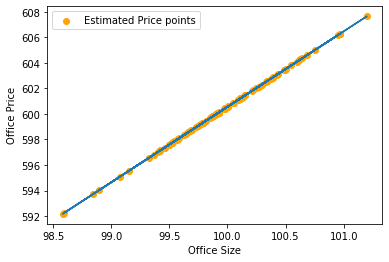

In [42]:
plt.scatter(fake_dataset["Office Size"], fake_dataset["y"],label="Estimated Price points", color="Orange")
plt.plot(fake_dataset["Office Size"], fake_dataset["y"])
plt.ylabel("Office Price")
plt.xlabel("Office Size")
plt.legend()